### 複数の説明変数を用いるロジスティック回帰

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Irisデータセットの読み込み
iris = sns.load_dataset('iris')

# matplotlib: 日本語フォントの設定
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 
                               'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [2]:
# species が setosa のデータを除去
df = iris.query('species!="setosa"')

# ダミー変数化
df = pd.get_dummies(data=df, drop_first=True)

# 確認
df.iloc[[0, 50]]

,sepal_length,sepal_width,petal_length,petal_width,species_virginica
50,7.0,3.2,4.7,1.4,0
100,6.3,3.3,6.0,2.5,1


7_2_logistic.ipynb でのAUCの比較では、petal_length が単一の説明変数では最もAUCが高かった。<br>
petal_lengthと他の説明変数の組み合わせではどうなるかを比較する。

In [3]:
df.columns.drop('sepal_length')

Index(['sepal_width', 'petal_length', 'petal_width', 'species_virginica'], dtype='object')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Hiragino Maru Gothic Pro, Yu Gothic, Meirio, Takao, IPAexGothic, IPAPGothic, Noto Sans CJK JP
/home/ryujioda/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ryujioda/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Hiragino Maru Gothic Pro, Yu Gothic, Meirio, Takao, IPAexGothic, IPAPGothic, Noto Sans CJK JP
/home/ryujioda/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:24

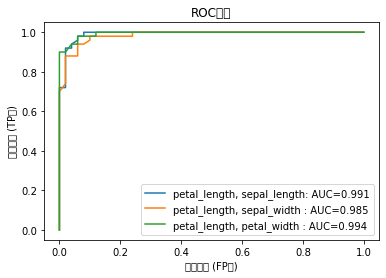

In [4]:
# ロジスティック回帰モデルを作成
model = LogisticRegression(C=10000.0)

# 固定する説明変数
x1_label = 'petal_length'

# dfの列名から x1_label と 'species_virginica' を除去し、それぞれについて、for ループ内を実行
for x2_label in df.columns.drop([x1_label, 'species_virginica']):
    # 説明変数、目的変数
    X = df[[x1_label, x2_label]]
    Y = df.species_virginica

    # ロジスティック回帰モデルを作成
    model.fit(X, Y)

    # ROC曲線, AUC
    Y_proba = model.predict_proba(X)
    fpr, tpr, thresholds = roc_curve(Y, Y_proba[:, 1])
    plt.plot(fpr, tpr, label='{:12}, {:12}: AUC={:.3f}'.format(
        x1_label, x2_label, auc(fpr, tpr)))
    plt.legend()

plt.xlabel('偽陽性率 (FP率)')
plt.ylabel('真陽性率 (TP率)')
plt.title('ROC曲線')
plt.show()